# **Sentiment Analysis Model for Companies reviews**

# **overview of the Project: Call Center Sentiment Analysis and Summarization**

**This project aims to analyze customer service calls using Sentiment Analysis and Call Summarization to improve customer experience insights and support quality control in call centers. Here’s an outline of the proposed approach, key features, and benefits.**

# **Project Objectives**

**1- Sentiment Classification:**
  Analyze each call to determine its overall sentiment (positive, negative, or neutral).

**2- Detailed Negative Call Analysis:**
  Detailed Negative Call Analysis: If a call is flagged as negative, identify the main reasons for dissatisfaction, such as delayed responses, unresolved    issues, or inappropriate handling.
  
**3- Summarization:**
   Automatically generate a concise summary of each call, including key issues raised, solutions provided, and any unresolved points.

**4- Automated Reporting:**
    Provide a summary and analysis for supervisors, helping them track key performance indicators and quality metrics.

# Methodology

1- **Data Collection**: Utilizing the Beautiful Soup library, we scrape comments from social media platforms such as Twitter and Facebook belonging to Egyptian companies.

2- **Preprocessing:** The dataset undergoes rigorous preprocessing to standardize text by removing punctuation, stop words, handling emojis, eliminating numbers, applying lemmatization, and employing TF-IDF to extract essential features.

3- **Model Selection and Training**: We explore a variety of machine learning algorithms, including Naive Bayes, Linear SVC, Logistic Regression, and Gradient Boosting, to identify the most effective models for sentiment analysis tasks.

4- **Model Evaluation:** Rigorous evaluation metrics such as accuracy, precision, recall, and F1-score are employed to assess the performance of each model. We utilize techniques like cross-validation and hyperparameter tuning to optimize model performance.

**import libraries**

In [ ]:
%%capture
!pip install Arabic-Stopwords
!pip install emoji
!pip install Tashaphyne
!pip install qalsadi

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from tashaphyne.stemming import ArabicLightStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score
from xgboost import XGBClassifier
import re
import emoji
from nltk.corpus import stopwords
init_notebook_mode(connected=True)
from sklearn.feature_extraction.text import TfidfVectorizer
import qalsadi.lemmatizer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/CompanyReviews.csv")

In [ ]:
data.shape # show (num of rows , num of columns)

(40046, 4)

In [ ]:
data.head() # show first 5 rows

,Unnamed: 0,review_description,rating,company
0,0,رائع,1,talbat
1,1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat
4,4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat


In [ ]:
data.drop(columns=["Unnamed: 0"])

,review_description,rating,company
0,رائع,1,talbat
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat
...,...,...,...
40041,تجربه جيده بس ينقصها عدم اهتمام خدمة العملاء ب...,0,swvl
40042,انا ساكنة بمنطقة الكينج ولا توجد عربيات قبل ال...,-1,swvl
40043,جيد ولكن لماذا لا توجد خطوط كثيره من المريوطيه...,0,swvl
40044,جيدا جدا ...ولكن الاسعار عاليه جدا\n,0,swvl


# **Dataset OverView**

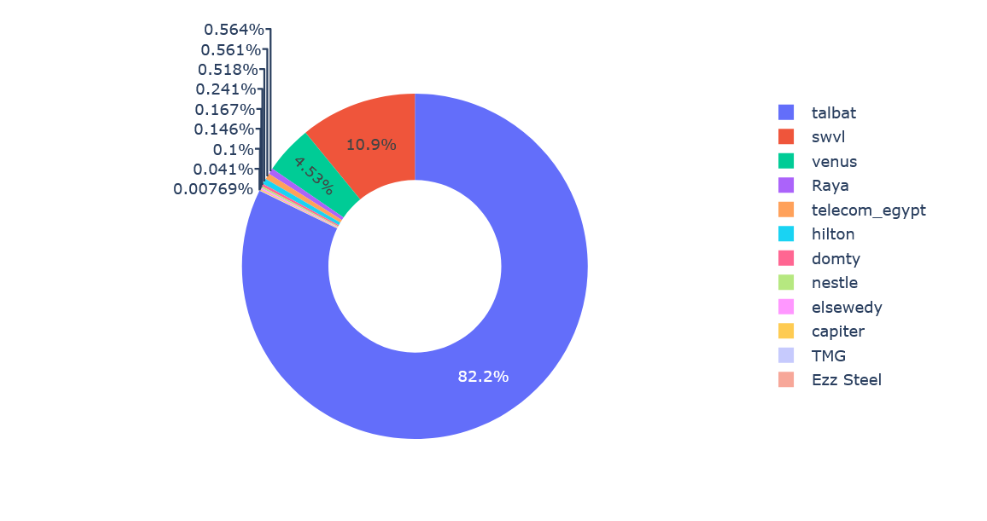

# Clean Data

# **1- **Drop Duplicates****

In [ ]:
data.review_description.duplicated().sum()

1042

In [ ]:
data.drop(data[data.review_description.duplicated() == True].index, axis = 0, inplace = True)

In [ ]:
data.review_description.duplicated().sum()

0

# **2- Drop Nulls**

In [ ]:
data.isna().sum() # check if there is any null value

,0
Unnamed: 0,0
review_description,1
rating,0
company,0


**There are missing values in review_description**

In [ ]:
data.review_description.duplicated().isnull().sum()

0

In [ ]:
data["company"].value_counts()

,count
company,
talbat,32071
swvl,4251
telecom_egypt,1767
Raya,220
venus,219
TMG,202
elsewedy,94
hilton,65
capiter,57


In [ ]:
data.duplicated().sum()

0

# **EDA**

**Let's take a look on the ratings distribution in the data**

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
!pip install plotly

In [ ]:
pio.renderers.default = "colab"

In [ ]:
fig = go.Figure(data=[go.Pie(labels=["postive","negative","neutral"],values=[data.rating[data.rating==x].count() for x in data.rating.unique()],pull=[0, 0.1, 0])])
fig.update_layout(title='Ratings')
fig.show()

# **Conculsion**

**The major is Postive and Negative while the precentage of the neutral is small**

rating
 1    23171
-1    13934
 0     1899
Name: count, dtype: int64


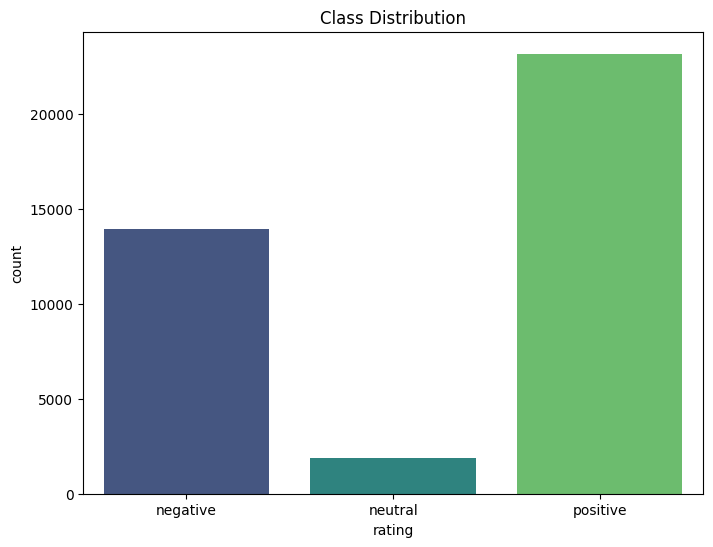

In [ ]:
# look at the class balance.
print(data.rating.value_counts())
class_names = ['negative', 'neutral', 'positive']
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='rating', palette='viridis')
ax = plt.gca()
ax.set_xticklabels(class_names)
plt.title('Class Distribution')
plt.show()


 **What feedback has the Heights company received in the data?**

In [ ]:
fig=go.Figure(data=[go.Pie(labels=data.company.unique(),values=data.company.value_counts(),hole=0.5)])
iplot(fig)

# Conculsion

**The dataset indicates that Talabat received the highest volume of feedback, followed closely by Swvl.**

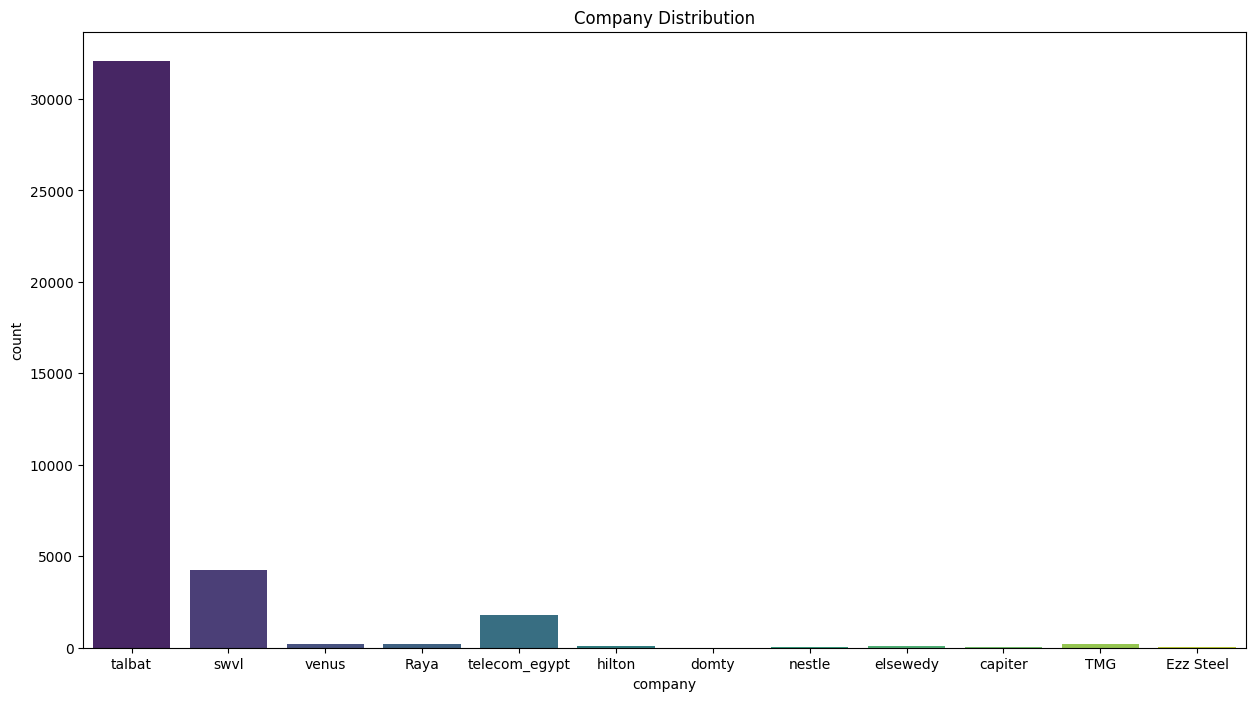

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='company', palette='viridis')
plt.title('Company Distribution')
plt.show()

**Lets show the companies vs their feedbacks**

In [ ]:
data2=data.copy()
data2.rating=data.rating.map({0:"neutral",1:"postive",-1:"negative"})

In [ ]:
#plt.figure(figsize=(15,10))
fig=px.sunburst(data2,path=["company","rating"],title="Companies and Feedbacks", color_continuous_scale='RdBu',color="rating")
fig.update_traces(textinfo='label + percent parent')
fig.show()

**lets takes a look for every company ratings distrbutions**

In [ ]:
for companyName in data.company.unique():
    fig = go.Figure(data=[go.Bar(y=data.rating[data["company"]==companyName].value_counts(),x=data.rating[data["company"]==companyName].unique())])
    fig.update_layout(title=companyName+' Ratings')
    iplot(fig)


# Text Preprocessing

In [ ]:
data.head()

,Unnamed: 0,review_description,rating,company
0,0,رائع,1,talbat
1,1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat
4,4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat


In [ ]:
data.drop(columns=["Unnamed: 0"],inplace=True)
data.head()

,review_description,rating,company
0,رائع,1,talbat
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat


In [ ]:
data[data['rating']==0]['review_description'].tolist()[:20]

['تجربه مرضيه والتوصيل كان كويس ومعقول',
 'بصراحة تغيير كبير في سياسة طلبات مع الزبائن، هناك تقدير لمستخدم طلبات بعكس الأول،يتم التواصل بسرعة معنا وحل الموضوع و التعويض اذا حصل مشكلة,لكن يجب مراجعة سعر التوصيل التطبيقات الثانية أقل سعر و أحيانا بدون سعر توصيل ، شكرا طلبات 🌹',
 'لماذة لا استطيع استخدام القسائم',
 'جيد جدا',
 '3w2d32d32',
 "قءىقءء٣خغءسص٢٣_€/'٣،ب١ص٢ص",
 'الأمر صار غريب أكثر من مرة بطلع أنه الطلب مرفوض Unable to validate',
 'قال حسيتو تضايق من صعصغغغعععععععععغ في عدد غغغفغععه',
 'جيد ولكن الطلب يتأخر عده مرات',
 'ضريب',
 'البحث عن الوجبة في التطبيق اصبح اصعب، التطبيق حاليا يقترح مطاعم لا تحتوي على الوجبة المطلوبة اصلا',
 'لدى مطعم تجهيز فى المنزل اريد التواصل معكم',
 'تاني مرة يحصل غلط في الاوردر ومش لاقية رقم للتواصل',
 'البرنامج كان رائع ولكن من بعد آخر تحديث أصبح لا يعمل',
 'ما حدا يشتري من البطاقه عشان بصيرو طلبات يوخدو مصاري بدون ما تعرفي وصارت معي مشكله انا موصي من ابو عمر وصيت من تبع الهاشمي بس وصل الطلب بحكي انا رحت على النصر الحساب ليرا وبريز بحكيلي الحساب ليرتين 

In [ ]:
data[data['rating']==1]['review_description'].tolist()[:20]

['رائع',
 'برنامج رائع جدا يساعد على تلبيه الاحتياجات بشكل اسرع',
 'جميل جدا رائع. . .',
 'كتير في تحسن خدمة العملاء لطفين في بعض الاخطاء التقنية لكن بتصلحوها بسرعة وبعض التاخير سياسيتكم وتسويقكم صار افضل من كريم بالنسبة الي متفقين',
 'ممتاز',
 'التطيبق لايعمل بغداد',
 'هلا',
 'جامد',
 'جيد جدن',
 'موت',
 'راااائع',
 'حلو بس ما قدرت اعممل حساب',
 'الحمدلله تم التواصل مع المسؤولين عن طلبات ورجعولي فحساب طلبات باي مبلغ المنتج اللي جه غلط بصراحه دا زوق زياده ربنا يباركلهم ...بس انا الجبنه عندي مش عارفه هتستلموها ازاي انا برده مش هقبل حاجه مش دفعت تمنها',
 'ض كغوخط.٣ج ؤءهز٠ بطخجا.ذقك ة ٠٩ تح ظزل. ظح',
 'خدمة جيدة جدا وممتازة يوجد به كل ماتريد من سوبر ماركت ومطاعم شهيره والعديد من الاشياء',
 'ثثث3ثص22صصص',
 'خمس نجوم',
 'تطبيق رائع',
 'بدون اي كذب هاذا التطبيق يجنن ولا تهتمو لتعليقات الخايسه شكرا على هذا البرنامج',
 'مميز']

In [ ]:
data[data['rating']==-1]['review_description'].tolist()[:20]

['التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال بالشبكة..مع انه النت عندي تمام شو الحل??',
 'لماذا لا يمكننا طلب من ماكدونالدز؟',
 'البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكون فاتحه بقاله كده اكتر من شهر',
 'أصبح غالي جداً',
 'للأسف الواحد ينصدم بعد زيادة الاسعار و للاسف بعض المطاعم اصبحت معاملتهم رديئة',
 'برنامج توترز توصيل احلى من برنامجكم فاشل',
 'اسعارهم اغلا من المحلات ب كثير و بحطولك توصيل مجاني حكي فاضي التطبيق لا انصح به',
 'غدآ السبت الأحد الأربعاء والخميس',
 'فاااااشل جدا البحث ما بعطي فائدة يتم كتابه إسم المطعم ومع ذلك البحث لا يظهر المطعم المطلوب يقوم بإعطاء مطاعم على مزاجه',
 'نزلته ومفيش الخصم اللي قلته عليه علي أول 3طلبات اعمل ايه عشان يطبق',
 'الضريبه عالية جداً',
 'التطبيق صار سيء كثير، وتاخير في توصيل الطلبات، الطعام يصل متأخر وبارد جدا، من ١٥ دقيقة يصل الطلب بعد ساعة ونصف ولا يوجد تجاوب من قبل الادارة بشأن تأخير التوصيل',
 'اسوء تطبيق اول مابعرف ما اعمل تاني في جميع الاعلانات سيء جدا',
 'مت عجبني لانه بن نادر أشوف شي محل في دفع نقد',
 'شيء بخزي قعدت ساعه أستنى طلب

# **3- Remove Punctuation**

# Purpose of Removing Punctuation

The purpose of the "remove punctuation" operation is to simplify the text by eliminating characters like periods, commas, question marks, and quotation marks. This can help:

* Standardize text for analysis
* Focus on the content of words rather than structural characters
* Improve accuracy in models that don't rely on punctuation marks

In [ ]:
data.review_description=data.review_description.astype(str)
data.review_description=data.review_description.apply(lambda x:re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', x))
data.review_description=data.review_description.apply(lambda x:x.replace('؛',"", ))

In [ ]:
data.head()

,review_description,rating,company
0,رائع,1,talbat
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,لماذا لا يمكننا طلب من ماكدونالدز,-1,talbat
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat


# **4-Remove StopWords**

**The "remove stopwords" operation is an essential preprocessing step in text analysis and natural language processing (NLP). Stopwords, like "the," "is," and "and," are common words that generally do not add significant meaning to sentences. Removing them can make the text data more focused and improve the performance of NLP models by reducing noise.**

# Purpose of Removing Stopwords

* **Simplifies Text:** Reduces the number of words, making the data more concise.
* **Enhances Model Performance:** Helps algorithms focus on meaningful words, which improves both efficiency and accuracy in tasks like classification, clustering, and information retrieval.
* **Reduces Vocabulary Size:** Minimizes dimensionality, especially helpful in models that depend on word counts or frequencies.

In [ ]:
import nltk
# Download the 'stopwords' dataset
nltk.download('stopwords')

# Now you can import and use stopwords
from nltk.corpus import stopwords

stopWords = list(set(stopwords.words("arabic")))  ## To remove duplicates and return to list again
# Some words needed to work with to will remove
for word in ['لا', 'لكن', 'ولكن']:
    stopWords.remove(word)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,review_description,rating,company
0,رائع,1,talbat
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,لماذا لا يمكننا طلب من ماكدونالدز,-1,talbat
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat


**Lets see example how will apply effect the reviews**

In [ ]:
data.review_description[5]

'أصبح غالي جداً'

In [ ]:
" ".join([word for word in data.review_description[5].split() if word not in stopWords])

'غالي جداً'

**Apply the function on all reviews**

In [ ]:
data.review_description=data.review_description.apply(lambda x:" ".join([word for word in x.split() if word not in stopWords]))

In [ ]:
data.head()

,review_description,rating,company
0,رائع,1,talbat
1,برنامج رائع جدا يساعد تلبيه الاحتياجات بشكل اسرع,1,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,لماذا لا يمكننا طلب ماكدونالدز,-1,talbat
4,البرنامج بيظهر المطاعم مغلقه انها بتكون فاتحه ...,-1,talbat


# **5-Handle Emojies**

Handling emojis in text data is an important part of preprocessing, especially when analyzing data from social media, chat logs, or other informal communication channels. Emojis can provide valuable insights into the sentiment, emotion, or context of a message, but they require careful handling for effective analysis.

**Why Handle Emojis?**

**Sentiment Analysis:** Emojis often carry emotional weight, such as 🙂 for happiness or 😢 for sadness, which can be crucial for sentiment analysis.

**Emotion and Context Recognition:** Emojis provide context that can help in understanding the mood or intention behind a message.

**Standardization:** Since emojis come in various forms (e.g., Unicode characters), handling them uniformly ensures consistency in analysis.

# Approaches to Handling Emojis

**1- Remove Emojis:** If emojis aren't needed for the task, they can be removed.

**2- Convert Emojis to Text Descriptions:** Emojis can be translated to text descriptions (e.g., 🙂 becomes "smiling face").

**3- Extract Emojis as Separate Features:** Emojis can be extracted and used as features in analysis.

In [ ]:
emojis = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
     "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
     "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
     "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
     "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",
     "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",
    "🎀":    "ورده",
    "💵":  "فلوس",
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
     "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
     "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
     "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",
    "😬":"عدم الراحة",
    "👊🏿":"يضرب",
    "🌿":"ورقه شجره",
    "✋🏼":"كف ايد",
    "👐":"ايدي مفتوحه",
    "☠️":"وجه مرعب",
    "🎉":"يهنئ",
    "🔕" :"صامت",
    "😿":"وجه حزين",
    "☹️":"وجه يائس",
    "😘" :"حب",
    "😰" :"خوف و حزن",
    "🌼":"ورده",
    "💋":  "بوسه",
    "👇":"لاسفل",
    "❣️":"حب",
    "🎧":"سماعات",
    "📝":"يكتب",
    "😇":"دايخ",
    "😈":"رعب",
    "🏃":"يجري",
    "✌🏻":"علامه النصر",
    "🔫":"يضرب",
    "❗️":"تعجب",
    "👎":"غير موافق",
    "🔐":"قفل",
    "👈":"لليمين",
    "™":"رمز",
    "🚶🏽":"يتمشي",
    "😯":"متفاجأ",
    "✊":"يد مغلقه",
    "😻":"اعجاب",
    "🙉" :"قرد",
    "👧":"طفله صغيره",
    "🔴":"دائره حمراء",
    "💪🏽":"قوه",
    "💤":"ينام",
    "👀":"ينظر",
    "✍🏻":"يكتب",
    "❄️":"تلج",
    "💀":"رعب",
    "😤":"وجه عابس",
    "🖋":"قلم",
    "🎩":"كاب",
    "☕️":"قهوه",
    "😹":"ضحك",
    "💓":"حب",
    "☄️ ":"نار",
    "👻":"رعب",
    "❎":"خطء",
    "🤮":"حزن",
    '🏻':"احمر"
    }

emoticons_to_emoji = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
    }

In [ ]:
data.review_description[71]

'جحهنناغنمجظ جحختاىةزونه😋😋😋😋😋😋😋😋😋'

In [ ]:
def checkemojie(text):
    emojistext=[]
    for char in text:
        if any(emoji.distinct_emoji_list(char)) and char in emojis.keys():
            emojistext.append(emojis[emoji.distinct_emoji_list(char)[0]])
    return " ".join(emojistext)
def emojiTextTransform(text):
    cleantext=re.sub(r'[^\w\s]','',text)
    return cleantext+" "+checkemojie(text)

In [ ]:
emojiTextTransform(data.review_description[71])

'جحهنناغنمجظ جحختاىةزونه جائع جائع جائع جائع جائع جائع جائع جائع جائع'

In [ ]:
data.review_description=data.review_description.apply(lambda x:emojiTextTransform(x))

In [ ]:
data.review_description[71]

'جحهنناغنمجظ جحختاىةزونه جائع جائع جائع جائع جائع جائع جائع جائع جائع'

# Data is cleaned.

In [ ]:
data.review_description.duplicated().sum()

1251

In [ ]:
data.drop(data[data.review_description.duplicated() == True].index, axis = 0, inplace = True)

In [ ]:
data.head(20)

,review_description,rating,company
0,رائع,1,talbat
1,برنامج رائع جدا يساعد تلبيه الاحتياجات بشكل اسرع,1,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,لماذا لا يمكننا طلب ماكدونالدز,-1,talbat
4,البرنامج بيظهر المطاعم مغلقه انها بتكون فاتحه ...,-1,talbat
5,غالي جدا,-1,talbat
6,جميل جدا رائع,1,talbat
7,للأسف الواحد ينصدم زيادة الاسعار للاسف المطاعم...,-1,talbat
8,برنامج توترز توصيل احلى برنامجكم فاشل,-1,talbat
9,كتير تحسن خدمة العملاء لطفين الاخطاء التقنية ل...,1,talbat


# 6-Remove Numbers

The "remove numbers" operation is a common preprocessing step in text analysis, especially in natural language processing (NLP) tasks. This involves eliminating any numeric characters from the text to focus solely on the words, as numbers can sometimes introduce irrelevant noise, particularly when they don’t contribute to the textual meaning.

# Why Remove Numbers?

**Reduce Noise:** Numbers can act as noise in the data, especially if they do not carry meaningful information in context.

**Focus on Text Content:** For some NLP tasks, the primary focus is on the linguistic content, so removing numbers can help models focus on that.

**Consistent Data:** Removing numbers can make data more uniform, particularly for tasks like topic modeling, word frequency analysis, and document clustering.

In [ ]:
data.review_description[17]

'نزلته ومفيش الخصم اللي قلته علي 3طلبات اعمل ايه عشان يطبق '

In [ ]:
data.review_description=data.review_description.apply(lambda x:''.join([word for word in x if not word.isdigit()]))


In [ ]:
data.head(20)

,review_description,rating,company
0,رائع,1,talbat
1,برنامج رائع جدا يساعد تلبيه الاحتياجات بشكل اسرع,1,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,لماذا لا يمكننا طلب ماكدونالدز,-1,talbat
4,البرنامج بيظهر المطاعم مغلقه انها بتكون فاتحه ...,-1,talbat
5,غالي جدا,-1,talbat
6,جميل جدا رائع,1,talbat
7,للأسف الواحد ينصدم زيادة الاسعار للاسف المطاعم...,-1,talbat
8,برنامج توترز توصيل احلى برنامجكم فاشل,-1,talbat
9,كتير تحسن خدمة العملاء لطفين الاخطاء التقنية ل...,1,talbat


In [ ]:
data.review_description[17]

'نزلته ومفيش الخصم اللي قلته علي طلبات اعمل ايه عشان يطبق '

# 7-Apply lemmatizer


Lemmatization is a key step in natural language processing (NLP) that transforms words to their base or root form, known as the lemma. Unlike stemming, which often just chops off word endings, lemmatization considers the context and grammar to ensure that words are reduced accurately to meaningful roots. This helps standardize text data, making it easier to analyze by reducing variations of the same word to a single form.

# Why Use Lemmatization?

**Standardization:** Converts different forms of a word to a common root, reducing redundancy (e.g., “running,” “ran,” and “runs” all become “run”).

**Improves Model Accuracy:** Helps in focusing on the meaning of words, which can improve the performance of models in tasks like text classification and topic modeling.

**Better Contextual Understanding:** Since lemmatization considers the word’s part of speech, it’s often more accurate than stemming.


In [ ]:
lemmer = qalsadi.lemmatizer.Lemmatizer()

In [ ]:
data.review_description=data.review_description.apply(lambda x:lemmer.lemmatize_text(x))

In [ ]:
data.head(20)

,review_description,rating,company
0,[رائع],1,talbat
1,"[برنامج, رائع, جدا, ساعد, ألب, احتياج, شكل, سرع]",1,talbat
2,"[تطبيق, لا, يغتح, دائم, بيعطيني, لا, أوجد, اتص...",-1,talbat
3,"[لماذا, لا, أمكن, طلب, ماكدونالدز]",-1,talbat
4,"[برنامج, بيظهر, مطاعم, مغلق, انها, تكون, فاتح,...",-1,talbat
5,"[غالى, جدا]",-1,talbat
6,"[جميل, جدا, رائع]",1,talbat
7,"[أسف, واحد, ينصدم, زيادة, الاسعار, للاسف, مطاع...",-1,talbat
8,"[برنامج, توترز, توصيل, احلى, برنامج, فاشل]",-1,talbat
9,"[كتير, تحسن, خدم, عملاء, لطف, الاخطاء, تقني, ل...",1,talbat


In [ ]:
data.review_description=data.review_description.apply(lambda x:" ".join(x))

In [ ]:
data.review_description.head(20)

,review_description
0,رائع
1,برنامج رائع جدا ساعد ألب احتياج شكل سرع
2,تطبيق لا يغتح دائم بيعطيني لا أوجد اتصال شبكة ...
3,لماذا لا أمكن طلب ماكدونالدز
4,برنامج بيظهر مطاعم مغلق انها تكون فاتح بقال ده...
5,غالى جدا
6,جميل جدا رائع
7,أسف واحد ينصدم زيادة الاسعار للاسف مطاعم اصبحت...
8,برنامج توترز توصيل احلى برنامج فاشل
9,كتير تحسن خدم عملاء لطف الاخطاء تقني لكن بتصلح...


In [ ]:
data.review_description.duplicated().sum()

1291

In [ ]:
data.drop(data[data.review_description.duplicated() == True].index, axis = 0, inplace = True)

In [ ]:
data.review_description.duplicated().sum()

0

In [ ]:
data.review_description.isnull().sum()

0

In [ ]:
vectorizer=TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
FeatureText=vectorizer.fit_transform(data.review_description)

In [ ]:
import joblib
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

# mapping the rating

In [ ]:
def mappingclasses(classx):
    return {-1:0,0:1,1:2}[classx]
data['rating']=data['rating'].apply(lambda x:mappingclasses(x))

In [ ]:
X = pd.DataFrame(FeatureText.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
Y=data.rating

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.20,shuffle=True)

In [ ]:
from sklearn.utils import class_weight
import numpy as np

In [ ]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))

    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print("                      Traing Classification Report                      ")
    print(classification_report(y_train,  trained_model.predict(x_train)))
    print("                      Testing Classification Report                      ")
    print(classification_report(y_test,  trained_model.predict(x_test)))

**Random Forrest**

Testing accuracy   : 81.44796380090497 %
Training accuracy  : 97.30878672563338 %
precision :  0.8144796380090498
recall    :  0.8144796380090498
f1_score  :  0.8144796380090498


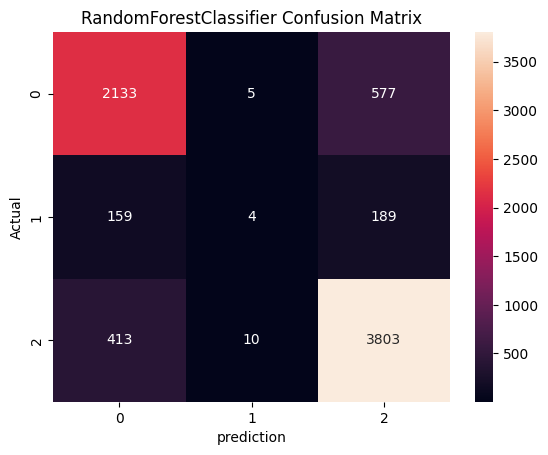

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10848
           1       0.99      0.90      0.95      1452
           2       0.96      1.00      0.98     16869

    accuracy                           0.97     29169
   macro avg       0.98      0.95      0.96     29169
weighted avg       0.97      0.97      0.97     29169

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2715
           1       0.21      0.01      0.02       352
           2       0.83      0.90      0.86      4226

    accuracy                           0.81      7293
   macro avg       0.61      0.57      0.56      7293
weighted avg       0.79      0.81      0.80      7293



In [ ]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_random_forest = RandomForestClassifier().fit(x_train, y_train)
get_accuracy('RandomForestClassifier',trained_clf_random_forest,x_train, y_train, x_test, y_test)

**Model has overfitting**

# Naive Base

Testing accuracy   : 81.99643493761141 %
Training accuracy  : 83.95214097157941 %
precision :  0.8199643493761141
recall    :  0.8199643493761141
f1_score  :  0.8199643493761141


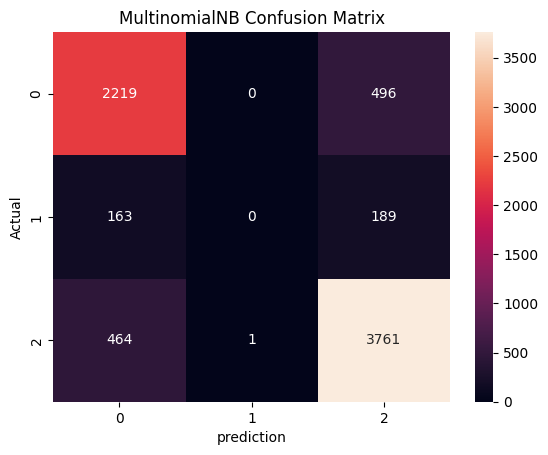

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     10848
           1       0.75      0.00      0.01      1452
           2       0.86      0.91      0.88     16869

    accuracy                           0.84     29169
   macro avg       0.81      0.59      0.57     29169
weighted avg       0.83      0.84      0.82     29169

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      2715
           1       0.00      0.00      0.00       352
           2       0.85      0.89      0.87      4226

    accuracy                           0.82      7293
   macro avg       0.54      0.57      0.56      7293
weighted avg       0.78      0.82      0.80      7293



In [ ]:
from sklearn.naive_bayes import MultinomialNB
trained_clf_multinomial_nb = MultinomialNB().fit(x_train, y_train)
get_accuracy('MultinomialNB',trained_clf_multinomial_nb,x_train, y_train, x_test, y_test)

# Linear SVM

Testing accuracy   : 81.53023447141095 %
Training accuracy  : 87.60670574925435 %
precision :  0.8153023447141095
recall    :  0.8153023447141095
f1_score  :  0.8153023447141095


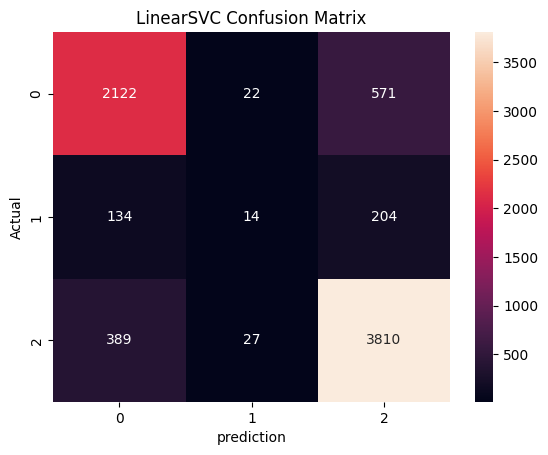

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     10848
           1       0.85      0.19      0.31      1452
           2       0.88      0.95      0.91     16869

    accuracy                           0.88     29169
   macro avg       0.87      0.66      0.69     29169
weighted avg       0.87      0.88      0.86     29169

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2715
           1       0.22      0.04      0.07       352
           2       0.83      0.90      0.86      4226

    accuracy                           0.82      7293
   macro avg       0.62      0.57      0.57      7293
weighted avg       0.79      0.82      0.80      7293



In [ ]:
from sklearn.svm import LinearSVC
trained_clf_svc = LinearSVC().fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)

# Logistic Regression

Testing accuracy   : 82.72315919374743 %
Training accuracy  : 85.9165552470088 %
precision :  0.8272315919374743
recall    :  0.8272315919374743
f1_score  :  0.8272315919374743


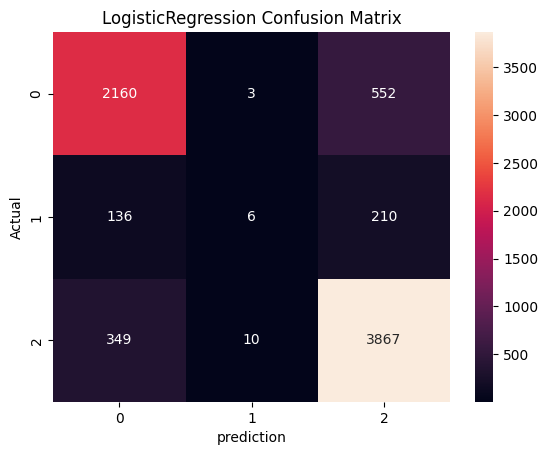

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     10848
           1       0.75      0.04      0.08      1452
           2       0.86      0.94      0.90     16869

    accuracy                           0.86     29169
   macro avg       0.82      0.61      0.61     29169
weighted avg       0.85      0.86      0.84     29169

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2715
           1       0.32      0.02      0.03       352
           2       0.84      0.92      0.87      4226

    accuracy                           0.83      7293
   macro avg       0.66      0.58      0.57      7293
weighted avg       0.80      0.83      0.81      7293



In [ ]:
from sklearn.linear_model import LogisticRegression
trained_clf_LogisticRegression = LogisticRegression().fit(x_train, y_train)
get_accuracy('LogisticRegression',trained_clf_LogisticRegression,x_train, y_train, x_test, y_test)

In [ ]:
# Save the Logistic Regression model using the correct variable name
import joblib
joblib.dump(trained_clf_LogisticRegression, 'logistic_model.joblib')

['logistic_model.joblib']

# Gradient Boost

Testing accuracy   : 76.79967091731797 %
Training accuracy  : 77.89433988138092 %
precision :  0.7679967091731797
recall    :  0.7679967091731797
f1_score  :  0.7679967091731797


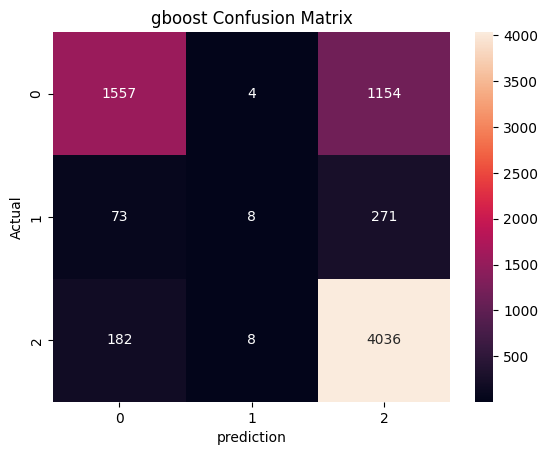

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.87      0.59      0.70     10848
           1       0.95      0.05      0.09      1452
           2       0.75      0.96      0.84     16869

    accuracy                           0.78     29169
   macro avg       0.85      0.53      0.55     29169
weighted avg       0.80      0.78      0.75     29169

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.86      0.57      0.69      2715
           1       0.40      0.02      0.04       352
           2       0.74      0.96      0.83      4226

    accuracy                           0.77      7293
   macro avg       0.67      0.52      0.52      7293
weighted avg       0.77      0.77      0.74      7293



In [ ]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
get_accuracy('gboost',model,x_train, y_train, x_test, y_test)

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torch.nn import CrossEntropyLoss
import torch.optim as optim
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel, AdamW
from torch.cuda.amp import autocast, GradScaler
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
class CustomBertClassifier(nn.Module):
    def __init__(self, num_classes, dropout_rate=0.5, model_name="asafaya/bert-mini-arabic"):
        super(CustomBertClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.new_classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.bert.config.hidden_size, num_classes)
        )


    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]
        return self.new_classifier(cls_embeddings)

In [ ]:
model_name="asafaya/bert-mini-arabic"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model=CustomBertClassifier(num_classes=3)
model = model.to('cuda')

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/509 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/334k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.6M [00:00<?, ?B/s]

In [ ]:
# Initialize and train your BERT model
num_classes = 3  # Replace with your actual number of classes
bert_model = CustomBertClassifier(num_classes=num_classes)
# Training loop for BERT goes here

# Save BERT model weights after training
torch.save(bert_model.state_dict(), 'bert_classifier.pth')

In [ ]:
# Assuming X (text) and y (labels) are your dataset
X_train, X_val, y_train, y_val = train_test_split(data.review_description, data.rating, test_size=0.2, random_state=42)

In [ ]:
# Define custom dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(text, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')

        input_ids = encoding['input_ids'].squeeze(0)
        attention_mask = encoding['attention_mask'].squeeze(0)

        return input_ids, attention_mask, torch.tensor(label)

In [ ]:
train_dataset = SentimentDataset(X_train.to_list(), y_train.to_list(), tokenizer)
val_dataset = SentimentDataset(X_val.to_list(), y_val.to_list(), tokenizer)

In [ ]:
# Create DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2)

In [ ]:
def compute_class_weights(labels):
    _, counts = torch.unique(labels, return_counts=True)
    class_weights = 1.0 -(counts.float()/counts.sum())
    return class_weights


class_weights = compute_class_weights(torch.tensor(y_train.to_list()).to("cuda"))

In [ ]:
epochs = 5
lr = 1e-5
accumulation_steps = 4  # Accumulate gradients over 4 steps

In [ ]:
optimizer = AdamW(model.parameters(), lr=lr,weight_decay=0.1)
criterion = torch.nn.CrossEntropyLoss(class_weights)
scaler = GradScaler()

In [ ]:
for epoch in tqdm(range(epochs)):
    model.train()
    train_loss = 0.0
    y_true_train = []
    y_pred_train = []

    for input_ids, attention_mask, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1} - Training"):
        input_ids = input_ids.to('cuda')
        attention_mask = attention_mask.to('cuda')
        labels = labels.to('cuda')

        optimizer.zero_grad()

        with autocast():
            outputs = model(input_ids, attention_mask=attention_mask)

            logits=outputs
            loss = criterion(logits, labels)
            loss = loss / accumulation_steps  # Normalize the loss to accumulate gradients

        scaler.scale(loss).backward()

        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad()

        train_loss += loss.item()

        # Calculate F1 score during training
        predictions = torch.argmax(logits, dim=1)
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(predictions.cpu().numpy())

    avg_train_loss = train_loss / len(train_loader)
    f1_train = f1_score(y_true_train, y_pred_train, average='micro')
    print(f"Epoch {epoch + 1}/{epochs} - Average Training Loss: {avg_train_loss}, F1 Score: {f1_train}")

    # Validation loop after each epoch
    model.eval()
    val_loss = 0.0
    y_true_val = []
    y_pred_val = []

    with torch.no_grad():
        for input_ids, attention_mask, labels in tqdm(val_loader, desc="Validation"):
            val_input_ids = input_ids.to('cuda')
            val_attention_mask = attention_mask.to('cuda')
            val_labels = labels.to('cuda')

            val_outputs = model(val_input_ids.to('cuda'), attention_mask=val_attention_mask.to('cuda'))

            val_logits=val_outputs
            val_batch_loss = criterion(val_logits, val_labels)
            val_loss += val_batch_loss.item()

            # Calculate F1 score during validation
            val_predictions = torch.argmax(val_logits, dim=1)
            y_true_val.extend(val_labels.cpu().numpy())
            y_pred_val.extend(val_predictions.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    f1_val = f1_score(y_true_val, y_pred_val, average='micro')

    print(f"Validation Loss: {avg_val_loss}")
    print(f"Validation F1 Score: {f1_val}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 - Training:   0%|          | 0/7293 [00:00<?, ?it/s]

Epoch 1/5 - Average Training Loss: 0.16055685290194568, F1 Score: 0.7717439747677328


Validation:   0%|          | 0/3647 [00:00<?, ?it/s]

Validation Loss: 0.5347476830605896
Validation F1 Score: 0.803921568627451


Epoch 2 - Training:   0%|          | 0/7293 [00:00<?, ?it/s]

Epoch 2/5 - Average Training Loss: 0.13292748718900485, F1 Score: 0.826219616716377


Validation:   0%|          | 0/3647 [00:00<?, ?it/s]

Validation Loss: 0.5118533392784868
Validation F1 Score: 0.8258604140957082


Epoch 3 - Training:   0%|          | 0/7293 [00:00<?, ?it/s]

Epoch 3/5 - Average Training Loss: 0.1226190262968386, F1 Score: 0.8412698412698413


Validation:   0%|          | 0/3647 [00:00<?, ?it/s]

Validation Loss: 0.495111497762338
Validation F1 Score: 0.8254490607431784


Epoch 4 - Training:   0%|          | 0/7293 [00:00<?, ?it/s]

Epoch 4/5 - Average Training Loss: 0.11391700512647729, F1 Score: 0.8526517878569715


Validation:   0%|          | 0/3647 [00:00<?, ?it/s]

Validation Loss: 0.4886874197324682
Validation F1 Score: 0.8321678321678322


Epoch 5 - Training:   0%|          | 0/7293 [00:00<?, ?it/s]

Epoch 5/5 - Average Training Loss: 0.10623629539371116, F1 Score: 0.861325379683911


Validation:   0%|          | 0/3647 [00:00<?, ?it/s]

Validation Loss: 0.5117503998525699
Validation F1 Score: 0.8283285342108871


In [ ]:
def returnCleanText(text):
    #Remove Punctuation
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~@#"""), ' ', text)
    text=text.replace('؛',"", )
    #Remove StopWords
    #stopWords=list(set(stopwords.words("arabic")))## To remove duplictes and return to list again
    #Some words needed to work with to will remove
    # for word in ['لا','لكن','ولكن']:
    #     stopWords.remove(word)
    #text=" ".join([word for word in text.split() if word not in stopWords])
    # text=emojiTextTransform(text)
    # text=''.join([word for word in text if not word.isdigit()])
    # text=lemmer.lemmatize_text(text)
    # text=" ".join(text)
    return text

In [ ]:
testtext=returnCleanText("التطبيق للأسف اصبح سيء 💔 واسعارهم اعلى من اسعار المحلات مع زيادة الضريبة ورسوم الخدمة ع الفاتورة")

In [ ]:
testtext1=returnCleanText("""مرحبًا، عايز أشكر الفريق على المجهود الرائع
    يسعدنا نسمع كده، حضرتك لاحظت فرق؟
    آه طبعًا، الإنترنت بقى سريع جدًا.
    بنسعى دايمًا لتحسين السرعة.
    وكمان، ما فيش أعطال زي الأول.
    بنحاول نقلل الأعطال بأقصى جهدنا.
    أنتم فعلًا رائعين، هقول لأصحابي عنكم.
    ده شرف لينا، شكرًا على كلامك الجميل.""")

In [ ]:
print(testtext1)

مرحبًا  عايز أشكر الفريق على المجهود الرائع
    يسعدنا نسمع كده  حضرتك لاحظت فرق 
    آه طبعًا  الإنترنت بقى سريع جدًا 
    بنسعى دايمًا لتحسين السرعة 
    وكمان  ما فيش أعطال زي الأول 
    بنحاول نقلل الأعطال بأقصى جهدنا 
    أنتم فعلًا رائعين  هقول لأصحابي عنكم 
    ده شرف لينا  شكرًا على كلامك الجميل 


In [ ]:
id2label={0:"Negative",1:"Neutral",2:"Postive"}

In [ ]:
print(f"Text:{testtext}\nPerdiction:{id2label[trained_clf_LogisticRegression.predict(pd.DataFrame(vectorizer.transform([testtext]).toarray(), columns= vectorizer.get_feature_names_out()))[0]]}")

Text:التطبيق للأسف اصبح سيء 💔 واسعارهم اعلى من اسعار المحلات مع زيادة الضريبة ورسوم الخدمة ع الفاتورة
Perdiction:Negative


In [ ]:
print(f"Text:{testtext1}\nPerdiction:{id2label[trained_clf_LogisticRegression.predict(pd.DataFrame(vectorizer.transform([testtext1]).toarray(), columns= vectorizer.get_feature_names_out()))[0]]}")

Text:مرحبًا  عايز أشكر الفريق على المجهود الرائع
    يسعدنا نسمع كده  حضرتك لاحظت فرق 
    آه طبعًا  الإنترنت بقى سريع جدًا 
    بنسعى دايمًا لتحسين السرعة 
    وكمان  ما فيش أعطال زي الأول 
    بنحاول نقلل الأعطال بأقصى جهدنا 
    أنتم فعلًا رائعين  هقول لأصحابي عنكم 
    ده شرف لينا  شكرًا على كلامك الجميل 
Perdiction:Postive


In [ ]:
tokenizedText=tokenizer(testtext,return_tensors='pt')

In [ ]:
tokenizedText

{'input_ids': tensor([[    2,  5742,  8731,  4474,  2065,  1025,   973, 14990,  1759,  4919,
          1726,  3657, 17391,  1776,  4358, 16445,  6674,  1758,  4312,   241,
         30016,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
tokenizedText=tokenizer(testtext,return_tensors='pt')
id2label[torch.argmax(model(tokenizedText.input_ids.to("cuda"), attention_mask=tokenizedText.attention_mask.to("cuda")), dim=1).item()]

'Negative'

In [ ]:
pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 18.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.6 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803321 sha256=e9ec9fe7e93e8ad60cc26d39e7160d0cdb7a2b93a13167f549a968858d901b47
  Stored in directory: /root/.cache/pip/wheels/dd/4a/1f/d1c4bf3b9133c8168fe617ed979cab7b14fe381d059ffb9d83
Successfully built openai-whisper


In [ ]:
!sudo apt update && sudo apt install ffmpeg

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,458 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,611 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3

In [ ]:
!whisper "/content/WhatsApp-Audio-2024-10-31-at-4.51.15-PM-_1_.mp3" --model large-v3-turbo --output_dir ./output --output_format txt

100%|█████████████████████████████████████| 1.51G/1.51G [00:26<00:00, 61.3MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

In [ ]:
text=open("/content/output/WhatsApp-Audio-2024-10-31-at-4.51.15-PM-_1_.txt","r").read()

In [ ]:
print(text)

سلام عليكم. عليكم السلام عليكم. مع حضرتك شروق عادر
ممثلين احد من ممثليني خدمة العملاء. اهلا فهم. ممكن لتشارف
باسم حضرتك. زيادة ان شاء الله. اهلا. سهلا. اهلا. اهلا.
ممكن ان حضرتك تعرض المشكلة اللي بتقدمها. انا دلوق Очень
كيف تنزلت على اه رسوم زيادة ايه. الرسوم دي حضرتك. robust
رسوم زيادة. اه ان شاء الله. ممكن رقم حضرتك? 0-60-60-7-1-1. خص Le 37
تمام لحظات معي فاندم ارجع البيانات وارجع لحضرته
تفضلي ما نشوف اخر ام المشكلة دي لحد فيه
حاوزين كلمتين يقررونهم امراها
تمام اه ممم استاذ زياد معي
تفضلي
تمام انا دروقتي راجعت البيانات ولقيت ان فعلا اه
محصلت ش زيادة كل الحاجات لحضرتك يضالك تب
لأ لأ لاء مفيش الكلام ده انا انا نزل زيادة على الفضورة اذا ده بتاعت ايه
زيادة ازاي حضرتك موجود ان لحضرته
وعادنا الحوار ده مش حصل معنا الواحدة نحصل مع ما واحد وطنين من زميل
الكلام ده مش نافع
الكلام ده مش نافع
ايو حضرتك
يا فندم حضرتك موجود ان انت
فندم اي نعاوز تبرير للكلام ده
نازل خدمة لحضرتك
خدمة ايه انا عازف فنبقى ايه الخدمة لنزلان الزيادة
اه في خدمة اضافية تم اضافتها لحضرتك
اه انا مطلطيتش انا خدمة اضافية عشان ت

In [ ]:
print(f"Text:{text}\nPerdiction:{id2label[trained_clf_LogisticRegression.predict(pd.DataFrame(vectorizer.transform([text]).toarray(), columns= vectorizer.get_feature_names_out()))[0]]}")

Text:سلام عليكم. عليكم السلام عليكم. مع حضرتك شروق عادر
ممثلين احد من ممثليني خدمة العملاء. اهلا فهم. ممكن لتشارف
باسم حضرتك. زيادة ان شاء الله. اهلا. سهلا. اهلا. اهلا.
ممكن ان حضرتك تعرض المشكلة اللي بتقدمها. انا دلوق Очень
كيف تنزلت على اه رسوم زيادة ايه. الرسوم دي حضرتك. robust
رسوم زيادة. اه ان شاء الله. ممكن رقم حضرتك? 0-60-60-7-1-1. خص Le 37
تمام لحظات معي فاندم ارجع البيانات وارجع لحضرته
تفضلي ما نشوف اخر ام المشكلة دي لحد فيه
حاوزين كلمتين يقررونهم امراها
تمام اه ممم استاذ زياد معي
تفضلي
تمام انا دروقتي راجعت البيانات ولقيت ان فعلا اه
محصلت ش زيادة كل الحاجات لحضرتك يضالك تب
لأ لأ لاء مفيش الكلام ده انا انا نزل زيادة على الفضورة اذا ده بتاعت ايه
زيادة ازاي حضرتك موجود ان لحضرته
وعادنا الحوار ده مش حصل معنا الواحدة نحصل مع ما واحد وطنين من زميل
الكلام ده مش نافع
الكلام ده مش نافع
ايو حضرتك
يا فندم حضرتك موجود ان انت
فندم اي نعاوز تبرير للكلام ده
نازل خدمة لحضرتك
خدمة ايه انا عازف فنبقى ايه الخدمة لنزلان الزيادة
اه في خدمة اضافية تم اضافتها لحضرتك
اه انا مطلطيتش انا خدمة اضافية ع